PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, all of which include datasets. For this tutorial, we will be using a TorchVision dataset.

The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: transform and target_transform to modify the samples and labels respectively.



In [2]:
from torchvision.datasets import FashionMNIST
train = FashionMNIST('./fashionmnist_folder', train=True, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./fashionmnist_folder/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./fashionmnist_folder/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./fashionmnist_folder/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./fashionmnist_folder/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



Now that we have downloaded the dataset  the torchvision.datasets.FashionMNIST module, we'll use this as our train data and store it in 'train' variable.

In [3]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fashionmnist_folder
    Split: Train

Looking at the 'train,' we can see that the total number of datapoints in this package is 60000, and the data is stored at the current file location in the folder 'fashionmnist folder.' It also implies that the data will be used as training data split, which we will feed to the model.

In [4]:
train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCFFFA04D0>, 9)

In the preceding section, we attempted to demonstrate how a single element of train data is stored in the 'train.' We can see that the single data object is saved as an image file with the dimensions 28x28 pixels. We can also see that the data is presented in the form of an image and a number that indicates what the label for the image is.

In [5]:
image,label = train[0]

The code above separates the image and its label from the first data object in the 'train' variable.

In [6]:
image

The precise image that we split from train[0] can be seen if we just inspect the image that we recently stored above.
The image in this case resembles a shoe.

In [7]:
label

9

The label variable displays the label value for the information contained in the train[0] variable named "picture."

In [8]:
image,label = train[7]

We are currently giving the picture and label variables, which are currently storing the data values from the eighth object in the train variable, new values.

In [9]:
image

Again, when we look at the image variable that we reallocated, it appears to be a shirt with a 28x28 pixel size.

In [10]:
label

2

The label value for the eighth object of train variable is 2.

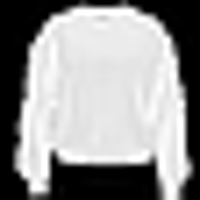

In [11]:
from PIL import Image
new_image = image.resize((200,200))
new_image

We imported the Image package from the PIL library and assigned a new image value with a pixel size of 200x200 to this variable to increase the pixel size. Although the image appears to be blurry, we can make out that it is a full sleeve T-shirt.

We will attempt to apply a classification modeling over the FashionMNIST data now that we are familiar with its data structure to determine whether or not our model works properly. Start by loading brand-new data for "train" and "test."

In [12]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



The training data was once again taken from the FashionMNIST dataset and saved in the "training data" variable in the code above. This variable contains the physical data from the "data" folder, which is then converted into tensors using the "ToTensor()" method.

The testing data was also saved in a variable called "test data," which is physically located in the "data" folder, and it was converted to tensors using the ToTensor() method.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using the above code segment, we have linked our 'Google drive' storage to this operation.

In [14]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Examining the training data's characteristics. With additional details like the name of the data folder, the type of data, and the type of transformation that was applied, there are 60000 total datapoints.

In [15]:
training_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

As you can see above, the image value which was originally present as a 28x28 pixel image is now converted to a matrix with image pixel values in decimals.

In [16]:
image,tag = training_data[0]

Splitting the training data into 'image' that holds the transformed image matrix value and 'tag' which holds the label of the dataset.

In [17]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

We can see that the 'image' variable is now holding all the first image value from the training dataset in the form of matrix.

In [18]:
tag

9

'tag' holds the label value in numeric form for the first object of the training data.

We will now map each label to its associated number in the code below, produce a figure that shows a 4x4 matrix of randomly chosen photos from the training dataset, and also include the corresponding labels that we mapped to the titles of each image.

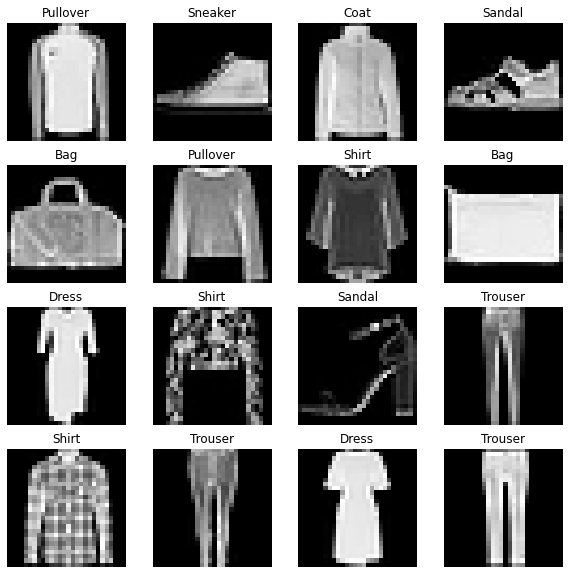

In [19]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

The above images shows the training image data and their corresponding correct labels.

We provide DataLoader with the Dataset as an argument. This allows automatic batching, sampling, shuffle, and multiprocess data loading while wrapping an iterable over our dataset. Here, we specify a batch size of 64, meaning that each element of the iterable returned by the dataloader will include a batch of 64 features and labels.

In [20]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [21]:
train_dataloader

This shows that the train_dataloader variable is now a data loader type and has the overall training data in batches.

In [22]:
for image,label in train_dataloader:
  print(image)
  print(label)
  print(len(image))

Streaming output truncated to the last 5000 lines.
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 

The data structure found in the variable "train dataloader" is displayed by the code above. It consists of 64-batch sizes, with the training data being divided up randomly.

**Developing Models**

In PyTorch, we create a class that derives from nn.Module in order to define a neural network. In the __init__ function, we create the network layers, and in the forward function, we define how data will move through the network. If a GPU is available, we relocate the neural network there to speed up processes.

In [23]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Optimizing the Model Parameters
To train a model, we need a loss function and an optimizer.



In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

The model makes predictions on the training dataset, which is fed to it in batches, then backpropogates the prediction error to change the model's parameters in a single training loop.

In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model’s performance against the test dataset to ensure it is learning.



In [26]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The instruction is spread out over numerous iterations (epochs). The model learns parameters during each epoch to produce more accurate predictions. We display the accuracy and loss of the model at each epoch; ideally, the accuracy and loss should improve over time.

In [27]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.289073  [    0/60000]
loss: 2.282492  [ 6400/60000]
loss: 2.254951  [12800/60000]
loss: 2.255104  [19200/60000]
loss: 2.234504  [25600/60000]
loss: 2.200303  [32000/60000]
loss: 2.216769  [38400/60000]
loss: 2.168007  [44800/60000]
loss: 2.176229  [51200/60000]
loss: 2.136246  [57600/60000]
Test Error: 
 Accuracy: 47.8%, Avg loss: 2.129429 

Epoch 2
-------------------------------
loss: 2.140164  [    0/60000]
loss: 2.132478  [ 6400/60000]
loss: 2.061413  [12800/60000]
loss: 2.075101  [19200/60000]
loss: 2.027306  [25600/60000]
loss: 1.961888  [32000/60000]
loss: 1.993786  [38400/60000]
loss: 1.899290  [44800/60000]
loss: 1.915871  [51200/60000]
loss: 1.829346  [57600/60000]
Test Error: 
 Accuracy: 56.8%, Avg loss: 1.827549 

Epoch 3
-------------------------------
loss: 1.871424  [    0/60000]
loss: 1.839597  [ 6400/60000]
loss: 1.705596  [12800/60000]
loss: 1.737040  [19200/60000]
loss: 1.644610  [25600/60000]
loss: 1.598367  [32000/600

Saving Models
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [28]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
The process for loading a model includes re-creating the model structure and loading the state dictionary into it.



In [29]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.



In [30]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


**Summary**

In the total procedure, we used the trochvision.dataset to obtain the fashionMNIST data and investigated the data values and data structure. After adding the label to the dataset with values, we developed a neural network model to take in and train over the training dataset we had prepared using dataloader and converted to tensors. Then we tried to reduce the model's loss by optimizing it to train for 10 epochs. The final model accuracy is 70.0 percent with an average loss of 0.793627.
Later, we attempted to make a prediction using the trained model that we had saved.